Sentimenatl Analysis of Customer Reviews


Button(button_style='danger', description='Start System', style=ButtonStyle())

Dropdown(index=1, options={'Analyze each model': 1, 'Predict rating for new review': 2, 'Compare Models': 3}, …

Button(button_style='danger', description='Click', style=ButtonStyle())

Customer Review


Text(value='')

Button(button_style='info', description='Find Rating', style=ButtonStyle())

Rating


Text(value='')

FloatProgress(value=0.0, description='Calculating')

Dropdown(index=1, options={'Analyze each model': 1, 'Predict rating for new review': 2, 'Compare Models': 3}, …

Button(button_style='danger', description='Click', style=ButtonStyle())

Classifier Model


Dropdown(options={'Logistic Regression': 1, 'SVM': 2, 'Multinomial Naive Bayes': 3, 'Bernoulli Naive Bayes': 4…

RadioButtons(options=('Accuracy', 'ROC Curve', 'Precision,Recall and F-Measure'), value='Accuracy')

Button(button_style='info', description='Submit', style=ButtonStyle())

Classifier Model


Dropdown(options={'Logistic Regression': 1, 'SVM': 2, 'Multinomial Naive Bayes': 3, 'Bernoulli Naive Bayes': 4…

RadioButtons(options=('Accuracy', 'ROC Curve', 'Precision,Recall and F-Measure'), value='Accuracy')

Button(button_style='info', description='Submit', style=ButtonStyle())



kNN Classifier
Please be patient. This may take some time.


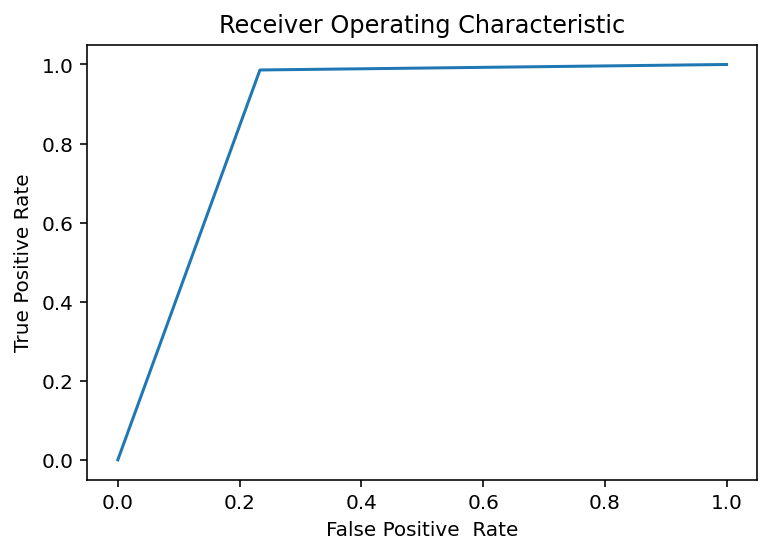



kNN Classifier
Please be patient. This may take some time.


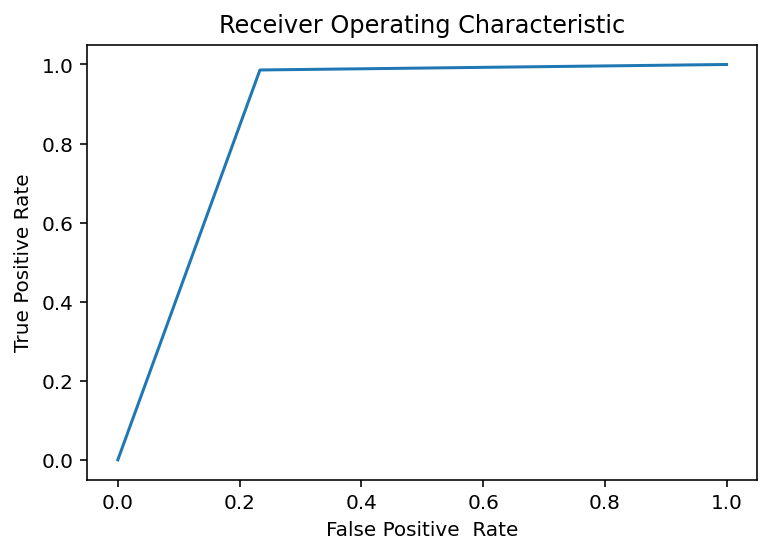

Dropdown(options={'Analyze each model': 1, 'Predict rating for new review': 2, 'Compare Models': 3}, value=1)

Button(button_style='danger', description='Click', style=ButtonStyle())

Customer Review


Text(value='good')

Button(button_style='info', description='Find Rating', style=ButtonStyle())

Rating


Text(value='Good')

Customer Review


Text(value='good')

Button(button_style='info', description='Find Rating', style=ButtonStyle())

Rating


Text(value='Good')

Customer Review


Text(value='good')

Button(button_style='info', description='Find Rating', style=ButtonStyle())

Rating


Text(value='Good')

FloatProgress(value=100.0, description='Calculating')

FloatProgress(value=100.0, description='Calculating')

FloatProgress(value=100.0, description='Calculating')

FloatProgress(value=100.0, description='Calculating')



Please wait. This may take a few minutes

Analyzing Logistic Regression

Analyzing Multinomial NB

Bernoulli NB

Analyzing Decision Tree

Analyzing Ensemble Classifier


In [2]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')
from ipywidgets import *
from IPython.display import display
from ipywidgets import FloatProgress  
import time
from IPython.html import widgets
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression

#Data cleaning and preprocessing

#from google.colab import files
#uploaded = files.upload()
#import io
#amazon_data = pd.read_csv(io.BytesIO(uploaded['Amazon_Unlocked_Mobile.csv']))

amazon_data = pd.read_csv("Amazon_Unlocked_Mobile.csv")
amazon_data = amazon_data.dropna(axis = 0)
amazon_data=amazon_data[["Reviews","Rating"]]
amazon_data_pos=amazon_data[amazon_data["Rating"].isin([4,5])]
amazon_data_neg=amazon_data[amazon_data["Rating"].isin([1,2])]
amazon_data_filtered=pd.concat([amazon_data_pos[:20000],amazon_data_neg[:20000]])
amazon_data_filtered["r"]=1
amazon_data_filtered["r"][amazon_data_filtered["Rating"].isin([1,2])]= 0

#Splitting Train and Test Data 

X_train_data,x_test_data,Y_train_data,y_test_data=train_test_split(amazon_data_filtered["Reviews"],amazon_data_filtered["r"],test_size=0.2)

#Text Transformation using TFIDF

tfidf_vector = TfidfVectorizer(stop_words="english")
tfidf_vector.fit(X_train_data)
X_train_data_new=tfidf_vector.transform(X_train_data)
x_test_data_new=tfidf_vector.transform(x_test_data)

predictions = dict()


#Widgets

start_button=Button(description="Start System",button_style='danger') 
drop_down_choice=widgets.Dropdown(options={'Analyze each model':1,'Predict rating for new review':2,'Compare Models':3},value=2)
choose_button=Button(description="Click",button_style='danger')    
drop_down=widgets.Dropdown(options={'Logistic Regression': 1, 'SVM': 2, 'Multinomial Naive Bayes': 3, 'Bernoulli Naive Bayes':4,'k-NN':5, 'Ensemble':6,'Decision Tree':7},value=1)
rad_button=widgets.RadioButtons(options=['Accuracy', 'ROC Curve', 'Precision,Recall and F-Measure',],value='Accuracy',disabled=False)
button= widgets.Button(description="Submit",button_style='info')
Inp_text = widgets.Text(description="", width=20000)   
button_rating= widgets.Button(description="Find Rating",button_style='info')
fp = FloatProgress(min=0,max=100,description="Calculating")  
Out_text=widgets.Text()

#1. SVM Classifier

def svm():   
    print("\n\nSVM Classifier")
    print("Please be patient. This may take some time.")
    svm_model = SVC()
    
    #Train Model
    svm_model.fit(X_train_data_new,Y_train_data) 
    
    #Test Model
    predictions['SVM']=svm_model.predict(x_test_data_new)   
    
    #Calculating Model Accuracy
    if rad_button.value=='Accuracy':
        print("Accuracy = "+str(accuracy_score(y_test_data,predictions['SVM'])))
        
    #Generating ROC Curve    
    if rad_button.value=='ROC Curve':
        false_positive, true_positive,_= roc_curve(y_test_data,predictions['SVM'])
        plt.title('Receiver Operating Characteristic')
        plt.plot(false_positive, true_positive)
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive  Rate')
        plt.show()
        
    #Calculating Precision, Recall and F-Measure
    if rad_button.value=='Precision,Recall and F-Measure':
        print(classification_report(y_test_data, predictions['SVM'], target_names = ["Good", "Bad"]))
        
        
        
#2. Multinomial Naive Bayes Classifier
        
def multinomial():
    print("\n\nMultinomial Naive Bayes Classifier")
    print("Please be patient. This may take some time.")
    mul_model = MultinomialNB()
    
    #Train Model
    mul_model.fit(X_train_data_new,Y_train_data)
    
    #Test Model
    predictions["Multinomial"] = mul_model.predict(x_test_data_new)  
    
    #Calculating Model Accuracy
    if rad_button.value=='Accuracy':
        print("Accuracy = "+str(accuracy_score(y_test_data,predictions["Multinomial"])))
        
    #Generating ROC Curve
    if rad_button.value=='ROC Curve':
        false_positive, true_positive,_= roc_curve(y_test_data,predictions['Multinomial'])
        plt.title('Receiver Operating Characteristic')
        plt.plot(false_positive, true_positive)
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive  Rate')
        plt.show()
        
    #Calculating Precision, Recall and F-Measure
    if rad_button.value=='Precision,Recall and F-Measure':
        print(classification_report(y_test_data, predictions['Multinomial'], target_names = ["Good", "Bad"]))
        
        
        
#3. Bernoulli Naive Bayes Classifier
        
def bernoulli():   
    print("\n\nBernoulli Naive Bayes Classifier")
    print("Please be patient. This may take some time.")
    ber_model = BernoulliNB()
    
    #Train Model
    ber_model.fit(X_train_data_new,Y_train_data)
    
    #Test Model
    predictions["BernoulliNB"]=ber_model.predict(x_test_data_new)  
    
    #Calculating Model Accuracy
    if rad_button.value=='Accuracy':
        print("Accuracy = "+str(accuracy_score(y_test_data,predictions["BernoulliNB"])))
        
    #Generating ROC Curve
    if rad_button.value=='ROC Curve':
        false_positive, true_positive,_= roc_curve(y_test_data,predictions["BernoulliNB"])
        plt.title('Receiver Operating Characteristic')
        plt.plot(false_positive, true_positive)
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive  Rate')
        plt.show()
        
    #Calculating Precision, Recall and F-Measure
    if rad_button.value=='Precision,Recall and F-Measure':
        print(classification_report(y_test_data, predictions["BernoulliNB"], target_names = ["Good", "Bad"]))
        
        
        
#4. k-NN Classifier
        
def knn():   
    print("\n\nkNN Classifier")
    print("Please be patient. This may take some time.")
    from sklearn.neighbors import KNeighborsClassifier
    knn_model = KNeighborsClassifier(n_neighbors=1)
    
    #Train Model
    knn_model.fit(X_train_data_new,Y_train_data)
    
    #Test Model
    predictions["knn"] = knn_model.predict(x_test_data_new)
    
    #Calculating Model Accuracy
    if rad_button.value=='Accuracy':
        print("Accuracy = "+str(accuracy_score(y_test_data,predictions["knn"])))
        
    #Generating ROC Curve
    if rad_button.value=='ROC Curve':
        false_positive, true_positive,_= roc_curve(y_test_data,predictions["knn"])
        plt.title('Receiver Operating Characteristic')
        plt.plot(false_positive, true_positive)
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive  Rate')
        plt.show()
        
    #Calculating Precision, Recall and F-Measure
    if rad_button.value=='Precision,Recall and F-Measure':
        print(classification_report(y_test_data, predictions["knn"], target_names = ["Good", "Bad"]))
        
        
        
#5. Ensemble Classifier
        
def ensmble():
    print("\n\nEnsemble Classifier")
    print("Please be patient. This may take some time.")
    ess_model = RandomForestClassifier()
    
    #Train Model
    ess_model.fit(X_train_data_new,Y_train_data)
    
    #Test Model
    predictions["EssembleClasification"] = ess_model.predict(x_test_data_new)
    
    #Calculating Model Accuracy
    if rad_button.value=='Accuracy':
        print("Accuracy = "+str(accuracy_score(y_test_data,predictions["EssembleClasification"])))
        
    #Generating ROC Curve
    if rad_button.value=='ROC Curve':
        false_positive, true_positive,_= roc_curve(y_test_data,predictions["EssembleClasification"])
        plt.title('Receiver Operating Characteristic')
        plt.plot(false_positive, true_positive)
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive  Rate')
        plt.show()
        
    #Calculating Precision, Recall and F-Measure
    if rad_button.value=='Precision,Recall and F-Measure':
        print(classification_report(y_test_data, predictions["EssembleClasification"], target_names = ["Good", "Bad"]))
        
    
        
#6. Decision Tree Classifier     
               
def dtree():    
    print("\n\nDecision Tree Classifier")
    print("Please be patient. This may take some time.")
    tree_model = tree.DecisionTreeClassifier()
    
    #Train Model
    tree_model.fit(X_train_data_new,Y_train_data)
    
    #Test Model
    predictions["DecisionTree"] = tree_model.predict(x_test_data_new)
    
    #Calculating Model Accuracy
    if rad_button.value=='Accuracy':
        print("Accuracy = "+str(accuracy_score(y_test_data,predictions["DecisionTree"])))
        
    #Generating ROC Curve
    if rad_button.value=='ROC Curve':
        false_positive, true_positive,_= roc_curve(y_test_data,predictions["DecisionTree"])
        plt.title('Receiver Operating Characteristic')
        plt.plot(false_positive, true_positive)
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive  Rate')
        plt.show()
        
    #Calculating Precision, Recall and F-Measure
    if rad_button.value=='Precision,Recall and F-Measure':
        print(classification_report(y_test_data, predictions["DecisionTree"], target_names = ["Good", "Bad"]))
        
        
        
#7. Logistic Regression Classifier
        
def log_reg():
    print("\n\nLogistic Regression Classifier")
    print("Please be patient. This may take some time.")
    lr_model = LogisticRegression()
    
    #Train Model
    lr_model.fit(X_train_data_new,Y_train_data)
    
    #Test Model
    predictions['LogisticRegression'] = lr_model.predict(x_test_data_new)
    
    #Calculating Model Accuracy
    if rad_button.value=='Accuracy':
        print("Accuracy = "+str(accuracy_score(y_test_data,predictions['LogisticRegression'])))
        
    #Generating ROC Curve    
    if rad_button.value=='ROC Curve':
        false_positive, true_positive,_= roc_curve(y_test_data,predictions['LogisticRegression'])
        plt.title('Receiver Operating Characteristic')
        plt.plot(false_positive, true_positive)
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive  Rate')
        plt.show()
        
    #Calculating Precision, Recall and F-Measure
    if rad_button.value=='Precision,Recall and F-Measure':
        print(classification_report(y_test_data, predictions['LogisticRegression'], target_names = ["Good", "Bad"]))
        
def compare_models():
    print("\n\nPlease wait. This may take a few minutes")
    print("\nAnalyzing Logistic Regression")
    lr_model = LogisticRegression()
    lr_model.fit(X_train_data_new,Y_train_data)
    predictions['LogisticRegression'] = lr_model.predict(x_test_data_new)
    print("\nAnalyzing Multinomial NB")
    mul_model = MultinomialNB()
    mul_model.fit(X_train_data_new,Y_train_data)
    predictions["Multinomial"] = mul_model.predict(x_test_data_new)  
    print("\nBernoulli NB")
    ber_model = BernoulliNB()
    ber_model.fit(X_train_data_new,Y_train_data)
    predictions["\nBernoulliNB"]=ber_model.predict(x_test_data_new)
    print("\nAnalyzing Decision Tree")
    tree_model = tree.DecisionTreeClassifier()
    tree_model.fit(X_train_data_new,Y_train_data)
    predictions["DecisionTree"] = tree_model.predict(x_test_data_new)
    print("\nAnalyzing Ensemble Classifier")
    ess_model = RandomForestClassifier()
    ess_model.fit(X_train_data_new,Y_train_data)
    predictions["EssembleClasification"] = ess_model.predict(x_test_data_new)
    print("\nAnalyzing SVM")
    svm_model = SVC()
    svm_model.fit(X_train_data_new,Y_train_data) 
    predictions['SVM']=svm_model.predict(x_test_data_new)
    print("\nAnalyzing k-NN")
    knn_model = KNeighborsClassifier(n_neighbors=1)
    knn_model.fit(X_train_data_new,Y_train_data)
    predictions["knn"] = knn_model.predict(x_test_data_new)
    print("\n\nCalculating Accuracy of each model.\n\n")
    #Model Accuracy Table
    print_results = {}
    for k,v in predictions.items():
        print_results[k] = accuracy_score(y_test_data,v)
    result_table=pd.DataFrame(list(print_results.items()), columns=["Model","Accuracy"])
    print(result_table)
    #Bar chart comparing accuracies of models
    plt.figure(figsize= (10,8))
    sns.barplot(x = "Model", y = "Accuracy", data = result_table)
    plt.title("Model accuracy")
    plt.xticks(rotation = 90)
    
    
  
        

#System GUI Code       

def analyze_each():
    print("Classifier Model")    
    display(drop_down)
    display(rad_button)
    display(button)

    def handle_submit(sender):
        if drop_down.value==1:
            log_reg()
        if drop_down.value==2:
            svm()
        if drop_down.value==3:
            multinomial()
        if drop_down.value==4:
            bernoulli()
        if drop_down.value==5:
            knn()
        if drop_down.value==6:
            ensmble()
        if drop_down.value==7:
            dtree()
    button.on_click(handle_submit)
    
    
    
def predict_rating():
    print("Customer Review")
    
    display(Inp_text)
    
    display(button_rating)
    print ("Rating")
   
    display(Out_text)
    def handle_submit(sender):
        display(fp)
        #Predicting Rating of the Input Review
        ess_model = RandomForestClassifier()
        ess_model.fit(X_train_data_new,Y_train_data)                             
        review=Inp_text.value
        new_test_transform = tfidf_vector.transform([review])        

        for i in range(100):  
            fp.value += 1
            time.sleep(0.1)
        if ess_model.predict(new_test_transform):
            Out_text.value="Good"
        else :
            Out_text.value="Bad"
    Inp_text.on_submit(handle_submit)
    button_rating.on_click(handle_submit)
    
    
    

def actions():
    
    display(drop_down_choice)    
    display(choose_button)
    def handle_choice(sender):
        if drop_down_choice.value==1:
            analyze_each()
        if drop_down_choice.value==2:
            predict_rating()
        if drop_down_choice.value==3:
            compare_models()
    choose_button.on_click(handle_choice)
    


print("Sentimenatl Analysis of Customer Reviews")
display(start_button)
def loading(sender):
    actions()
start_button.on_click(loading)
    

In [ ]:
from google.colab import drive
drive.mount('/content/drive')